In [2]:
import mysql.connector as my

con = my.connect(
    host='localhost',
    user = 'root',
    password ='******', 
    database='ecommerce'
)

cr = con.cursor()

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Query data from the 'customer' table
cr.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])
# Query data from the 'product' table
cr.execute('SELECT * FROM product')
product_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])
# Query data from the 'order_details' table
cr.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])
#printing first 5 records for customer_data from table
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C001,John Doe,New York,john.doe@example.com,123-456-7890,123 Elm Street,10001
1,C002,Jane Smith,Los Angeles,jane.smith@example.com,234-567-8901,456 Oak Avenue,90001
2,C003,Robert Brown,Chicago,robert.brown@example.com,345-678-9012,789 Pine Road,60601
3,C004,Emily Davis,Houston,emily.davis@example.com,456-789-0123,101 Maple Lane,77001
4,C005,Michael Wilson,Phoenix,michael.wilson@example.com,567-890-1234,202 Birch Street,85001


In [4]:
#printing first 5 records for product_data from each table
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P001,Wireless Mouse,Electronics,Computer Accessories,25.0,20.0,150
1,P002,Gaming Keyboard,Electronics,Computer Accessories,70.0,60.0,80
2,P003,Bluetooth Headphones,Electronics,Audio Devices,100.0,85.0,120
3,P004,4K Monitor,Electronics,Monitors,350.0,300.0,50
4,P005,Smartphone Charger,Electronics,Chargers,15.0,10.0,200


In [5]:
#printing first 5 records for order_data from each table
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,C001,P001,2.0,40.0,Credit Card,2024-08-01 10:30:00,Shipped
1,2,C002,P002,1.0,60.0,PayPal,2024-08-01 11:00:00,Delivered
2,3,C003,P003,3.0,255.0,Credit Card,2024-08-02 09:15:00,Processing
3,4,C004,P004,1.0,300.0,Bank Transfer,2024-08-02 14:45:00,Shipped
4,5,C005,P005,4.0,40.0,Debit Card,2024-08-03 16:00:00,Delivered


In [6]:
print("Customer data:\n")
print(customer_data.describe())

Customer data:

           pin_code
count     20.000000
mean   63696.000000
std    28886.465142
min    10001.000000
25%    40451.000000
50%    75651.000000
75%    86251.000000
max    98101.000000


In [7]:
print("Product data:\n")
print(product_data.describe())

Product data:

       original_price  selling_price       stock
count       20.000000      20.000000   20.000000
mean       149.250000     130.000000   80.250000
std        130.497782     116.314003   46.833271
min         15.000000      10.000000   20.000000
25%         67.500000      57.500000   48.750000
50%        110.000000      92.500000   70.000000
75%        162.500000     142.500000  102.500000
max        500.000000     450.000000  200.000000


In [8]:
print("Order data:\n")
print(order_data.describe())

Order data:

       order_id   quantity  total_price           order_date
count  20.00000  20.000000    20.000000                   20
mean   10.50000   1.650000   165.000000  2024-08-06 00:26:15
min     1.00000   1.000000    40.000000  2024-08-01 10:30:00
25%     5.75000   1.000000    93.750000  2024-08-03 15:07:30
50%    10.50000   1.000000   125.000000  2024-08-05 22:15:00
75%    15.25000   2.000000   228.750000  2024-08-08 10:52:30
max    20.00000   4.000000   450.000000  2024-08-10 12:30:00
std     5.91608   0.875094   111.035793                  NaN


In [9]:
print("Customer data:\n")
print(customer_data.info())

Customer data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  20 non-null     object
 1   name         20 non-null     object
 2   city         20 non-null     object
 3   email        20 non-null     object
 4   phone_no     20 non-null     object
 5   address      20 non-null     object
 6   pin_code     20 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ KB
None


In [10]:
print("Order data:\n")
print(order_data.info())

Order data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      20 non-null     int64         
 1   customer_id   20 non-null     object        
 2   product_id    20 non-null     object        
 3   quantity      20 non-null     float64       
 4   total_price   20 non-null     float64       
 5   payment_mode  20 non-null     object        
 6   order_date    20 non-null     datetime64[ns]
 7   order_status  20 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.4+ KB
None


In [11]:
# null values in customer data
print(customer_data.isna().sum())
print("\n")
print(product_data.isna().sum())
print("\n")
print(order_data.isna().sum())

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64


product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64


order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [12]:
print(customer_data.dropna())
print("\n")
print(product_data.dropna())
print("\n")
print(order_data.dropna())

   customer_id                name           city  \
0         C001            John Doe       New York   
1         C002          Jane Smith    Los Angeles   
2         C003        Robert Brown        Chicago   
3         C004         Emily Davis        Houston   
4         C005      Michael Wilson        Phoenix   
5         C006      Olivia Johnson   Philadelphia   
6         C007        James Miller    San Antonio   
7         C008     Sophia Martinez      San Diego   
8         C009      William Garcia         Dallas   
9         C010  Isabella Rodriguez       San Jose   
10        C011           David Lee         Austin   
11        C012          Mia Walker   Jacksonville   
12        C013       Daniel Harris  San Francisco   
13        C014     Charlotte Clark       Columbus   
14        C015       Matthew Lewis     Fort Worth   
15        C016        Amelia Young   Indianapolis   
16        C017         Ethan Allen      Charlotte   
17        C018          Avery King        Seat

In [13]:
# check for duplicate value
print("In Customer data: ",customer_data.duplicated().value_counts())
print("\n")
print("In Product date: ",product_data.duplicated().value_counts())
print("\n")
print("In Order data: ",order_data.duplicated().value_counts())

In Customer data:  False    20
Name: count, dtype: int64


In Product date:  False    20
Name: count, dtype: int64


In Order data:  False    20
Name: count, dtype: int64


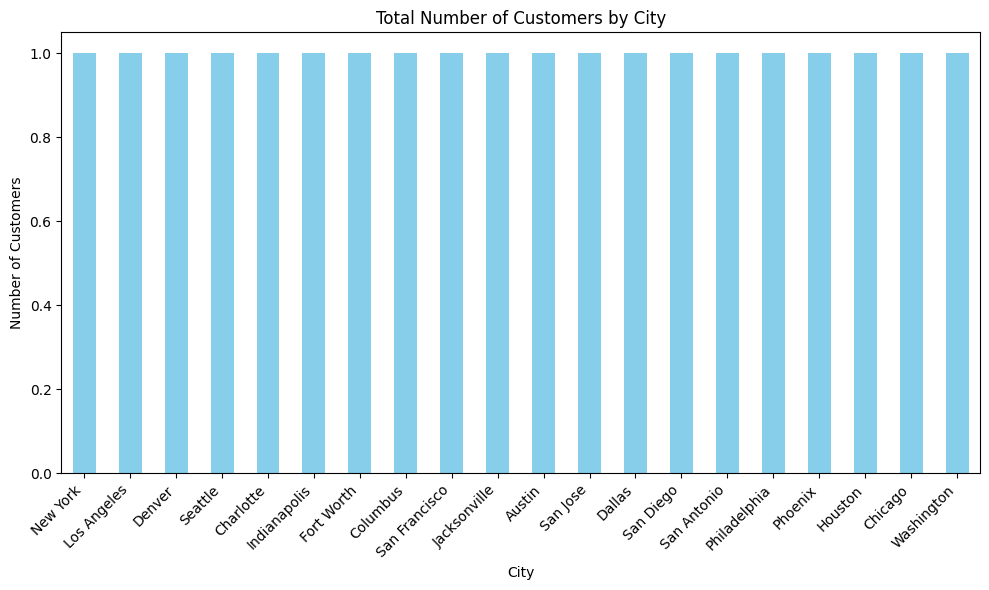

In [14]:
# Aggregate the number of customers by city
city_counts = customer_data['city'].value_counts()
city_counts

# Create and display a bar graph
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Count orders per customer
order_counts = order_data['customer_id'].value_counts()

# Convert to DataFrame for better readability
order_counts_df = order_counts.reset_index()
order_counts_df.columns = ['customer_id', 'number_of_orders']

# Merge with customer data to get names
customer_orders_df = pd.merge(order_counts_df, customer_data, on='customer_id')

# Sort by number of orders in descending order
customer_orders_df = customer_orders_df.sort_values(by='number_of_orders', ascending=False)

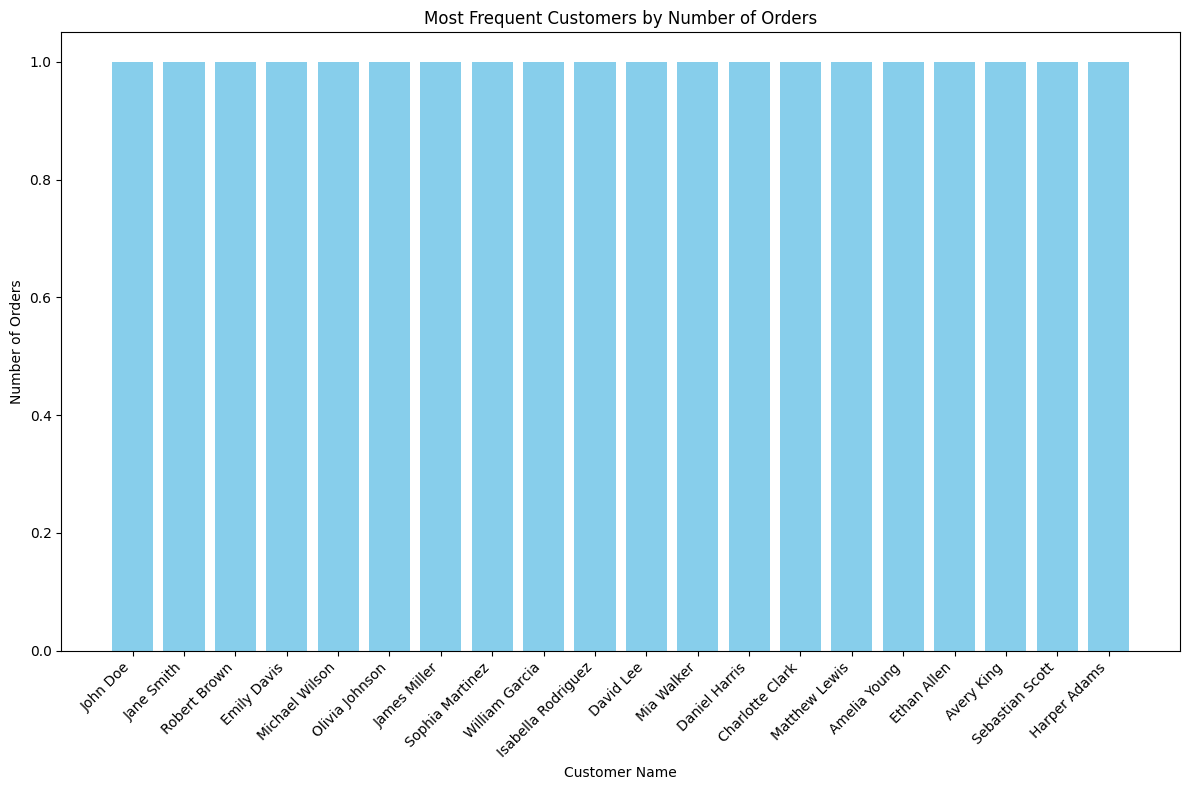

In [16]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(customer_orders_df['name'], customer_orders_df['number_of_orders'], color='skyblue')
plt.title('Most Frequent Customers by Number of Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

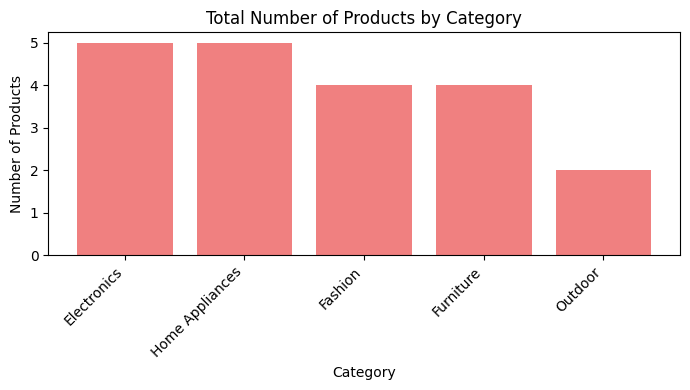

In [17]:
# Count products per category
category_counts = product_data['category'].value_counts()

# Convert to DataFrame for better readability
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Number of Products']

# Plotting the bar chart
plt.figure(figsize=(7, 4))
plt.bar(category_counts_df['Category'], category_counts_df['Number of Products'], color='lightcoral')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

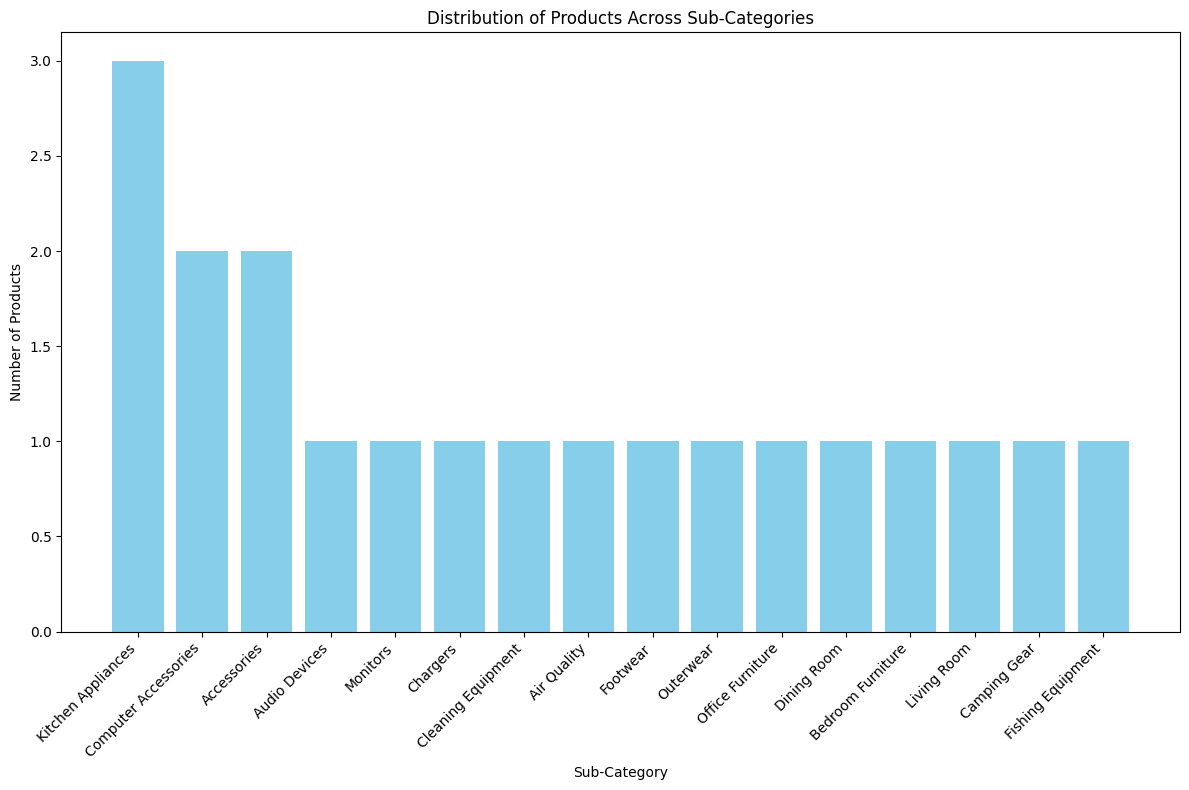

In [18]:
# Count the number of products per sub-category
sub_category_counts = product_data['sub_category'].value_counts()

# Convert to DataFrame for better readability
sub_category_counts_df = sub_category_counts.reset_index()
sub_category_counts_df.columns = ['Sub-Category', 'Number of Products']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(sub_category_counts_df['Sub-Category'], sub_category_counts_df['Number of Products'], color='skyblue')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

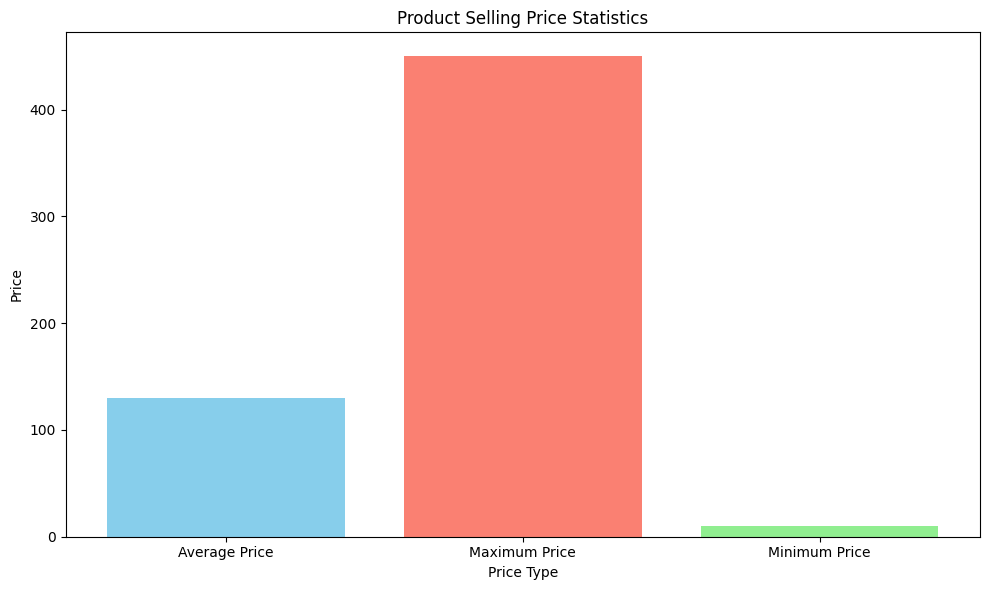

In [19]:
# Calculate statistics
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()

# Prepare data for the bar graph
statistics = {
    'Average Price': average_price,
    'Maximum Price': max_price,
    'Minimum Price': min_price
}

# Create and display a bar graph
plt.figure(figsize=(10, 6))
plt.bar(statistics.keys(), statistics.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Product Selling Price Statistics')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

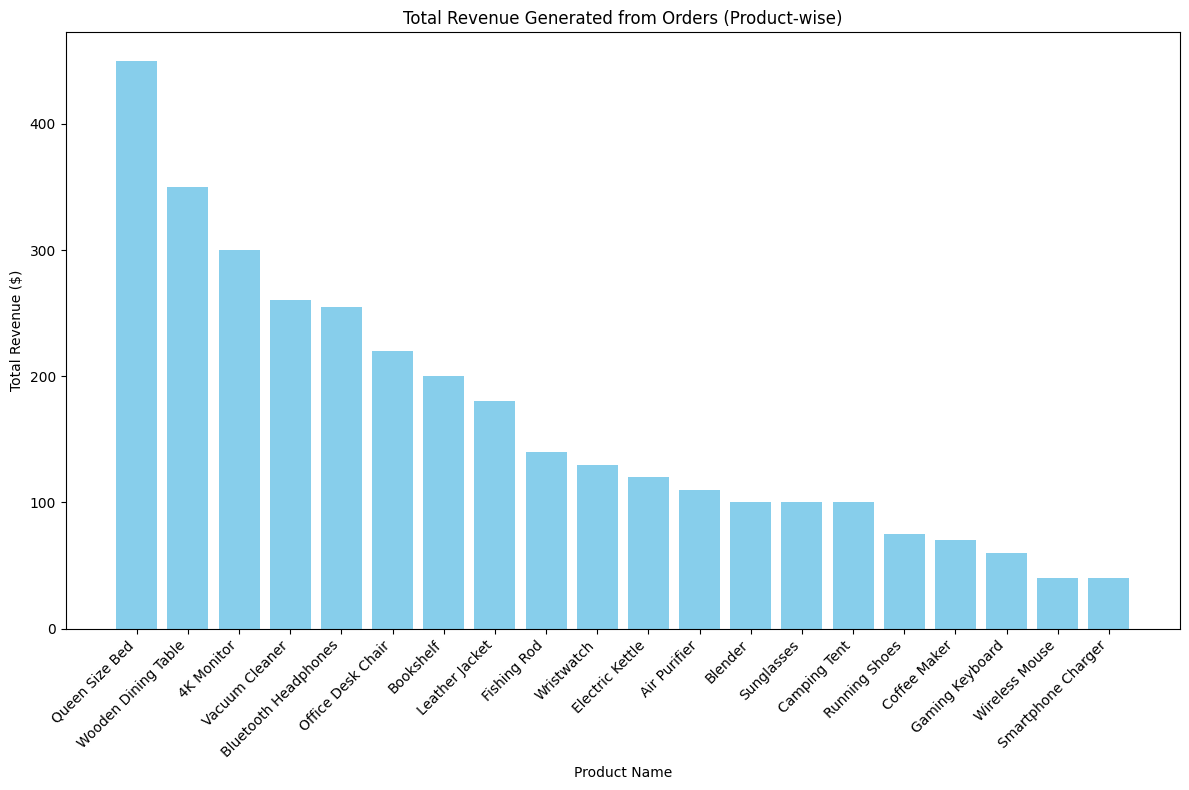

            product_name  total_revenue
0         Queen Size Bed          450.0
1    Wooden Dining Table          350.0
2             4K Monitor          300.0
3         Vacuum Cleaner          260.0
4   Bluetooth Headphones          255.0
5      Office Desk Chair          220.0
6              Bookshelf          200.0
7         Leather Jacket          180.0
8            Fishing Rod          140.0
9             Wristwatch          130.0
10       Electric Kettle          120.0
11          Air Purifier          110.0
12               Blender          100.0
13            Sunglasses          100.0
14          Camping Tent          100.0
15         Running Shoes           75.0
16          Coffee Maker           70.0
17       Gaming Keyboard           60.0
18        Wireless Mouse           40.0
19    Smartphone Charger           40.0


In [23]:
# Create a cursor object
cr = con.cursor()

# Query data to get total revenue by product
cr.execute('''
    SELECT product_id, SUM(total_price) AS total_revenue
    FROM order_details
    GROUP BY product_id
    ORDER BY total_revenue DESC
''')
revenue_data = pd.DataFrame(cr.fetchall(), columns=['product_id', 'total_revenue'])


cr.execute('SELECT product_id, product_name FROM product')
product_names = pd.DataFrame(cr.fetchall(), columns=['product_id', 'product_name'])



# Merge revenue data with product names
revenue_data = revenue_data.merge(product_names, on='product_id')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(revenue_data['product_name'], revenue_data['total_revenue'], color='skyblue')
plt.title('Total Revenue Generated from Orders (Product-wise)')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Display the revenue data
print(revenue_data[['product_name', 'total_revenue']])

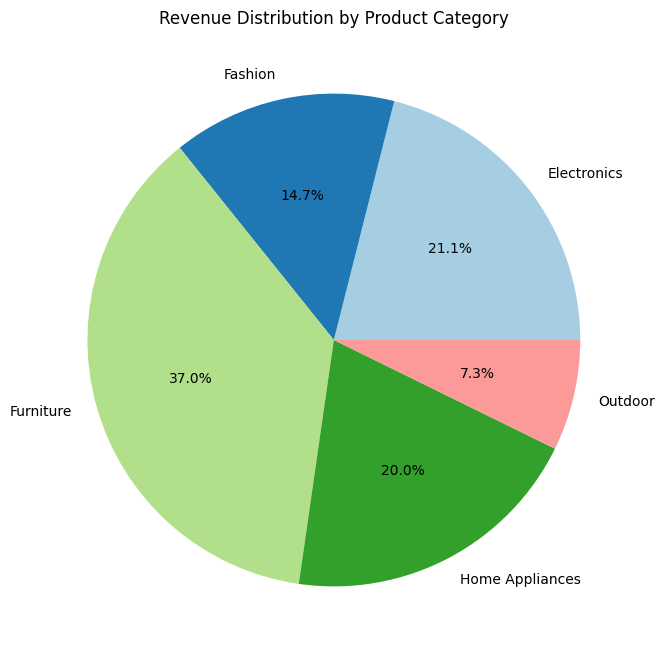

          category  total_revenue  percentage
0      Electronics          695.0   21.060606
1          Fashion          485.0   14.696970
2        Furniture         1220.0   36.969697
3  Home Appliances          660.0   20.000000
4          Outdoor          240.0    7.272727


In [24]:
# Query data from the 'order_details' table
cr.execute('''
    SELECT product_id, SUM(total_price) AS total_revenue
    FROM order_details
    GROUP BY product_id
''')

# Store the data into a Pandas DataFrame
order_revenue = pd.DataFrame(cr.fetchall(), columns=['product_id', 'total_revenue'])

# Query product categories
cr.execute('SELECT product_id, category FROM product')

# Store product categories into a Pandas DataFrame
product_categories = pd.DataFrame(cr.fetchall(), columns=['product_id', 'category'])

# Merge product categories with revenue data
revenue_with_category = order_revenue.merge(product_categories, on='product_id')

# Aggregate revenue by category
category_revenue = revenue_with_category.groupby('category')['total_revenue'].sum().reset_index()

# Calculate total revenue
total_revenue = category_revenue['total_revenue'].sum()

# Calculate percentage of total revenue for each category
category_revenue['percentage'] = (category_revenue['total_revenue'] / total_revenue) * 100

# Step 4: (Optional) Create and display a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_revenue['percentage'], labels=category_revenue['category'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_revenue))))
plt.title('Revenue Distribution by Product Category')
plt.show()

# Print the revenue and percentage by category
print(category_revenue)

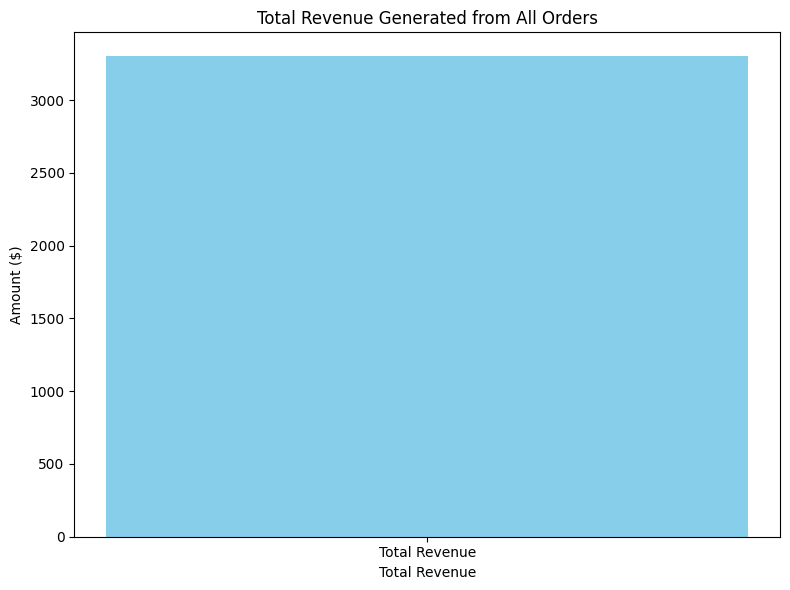

In [25]:
# Query to get total revenue from all orders
cr.execute('''
    SELECT SUM(total_price) AS total_revenue
    FROM order_details
''')
# Fetch the result
result = cr.fetchone()

# Extract total revenue from the result
total_revenue = result[0]

# Create a DataFrame for plotting
data = {'Total Revenue': [total_revenue]}
df = pd.DataFrame(data)

# Create and display a bar graph
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['Total Revenue'], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Total Revenue')
plt.ylabel('Amount ($)')
plt.xticks(df.index, ['Total Revenue'])
plt.tight_layout()
plt.show()

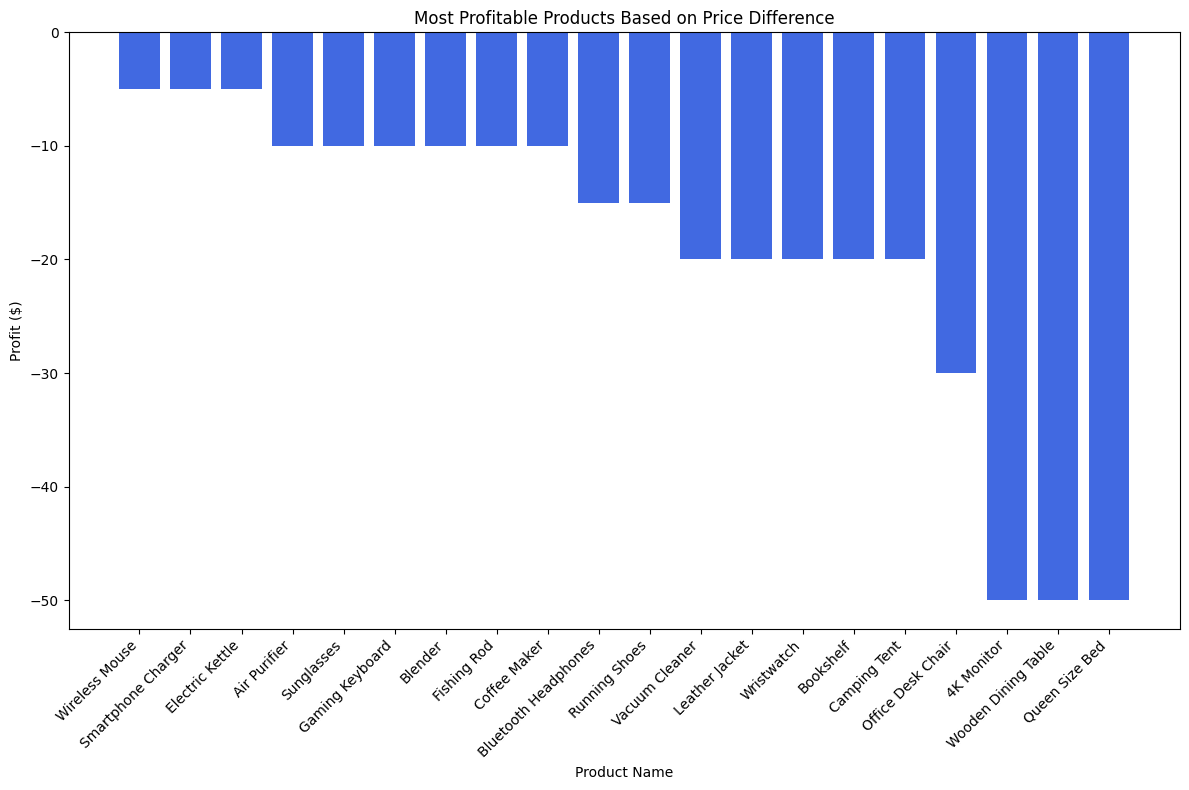

            product_name  profit
0         Wireless Mouse    -5.0
4     Smartphone Charger    -5.0
8        Electric Kettle    -5.0
7           Air Purifier   -10.0
12            Sunglasses   -10.0
1        Gaming Keyboard   -10.0
9                Blender   -10.0
19           Fishing Rod   -10.0
5           Coffee Maker   -10.0
2   Bluetooth Headphones   -15.0
10         Running Shoes   -15.0
6         Vacuum Cleaner   -20.0
11        Leather Jacket   -20.0
13            Wristwatch   -20.0
17             Bookshelf   -20.0
18          Camping Tent   -20.0
14     Office Desk Chair   -30.0
3             4K Monitor   -50.0
15   Wooden Dining Table   -50.0
16        Queen Size Bed   -50.0


In [26]:
# Create a cursor object
cr = con.cursor()

# Query data to get product details with original and selling prices
cr.execute('''
    SELECT product_id, product_name, original_price, selling_price
    FROM product
''')
product_data = pd.DataFrame(cr.fetchall(), columns=['product_id', 'product_name', 'original_price', 'selling_price'])

# Calculate profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products by profit in descending order
product_data = product_data.sort_values(by='profit', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(product_data['product_name'], product_data['profit'], color='royalblue')
plt.title('Most Profitable Products Based on Price Difference')
plt.xlabel('Product Name')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Display the profit data
print(product_data[['product_name', 'profit']])

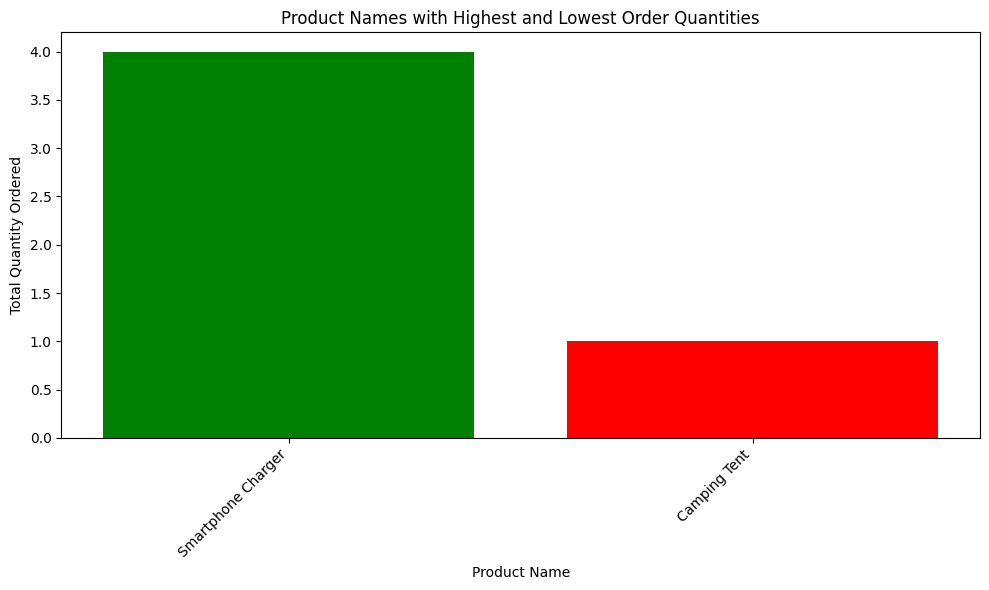

         product_name  total_quantity
0  Smartphone Charger             4.0
1        Camping Tent             1.0


In [27]:
# Create a cursor object
cr = con.cursor()

# Query data to get total quantity ordered per product
cr.execute('''
    SELECT p.product_name, SUM(od.quantity) AS total_quantity
    FROM order_details od
    JOIN product p ON od.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_quantity DESC
''')
quantity_data = pd.DataFrame(cr.fetchall(), columns=['product_name', 'total_quantity'])



# Identify products with highest and lowest order quantities
highest_quantity_product = quantity_data.iloc[0]
lowest_quantity_product = quantity_data.iloc[-1]

# Prepare data for the bar chart
chart_data = pd.DataFrame({
    'product_name': [highest_quantity_product['product_name'], lowest_quantity_product['product_name']],
    'total_quantity': [highest_quantity_product['total_quantity'], lowest_quantity_product['total_quantity']]
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(chart_data['product_name'], chart_data['total_quantity'], color=['green', 'red'])
plt.title('Product Names with Highest and Lowest Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Display the quantities data
print(chart_data)

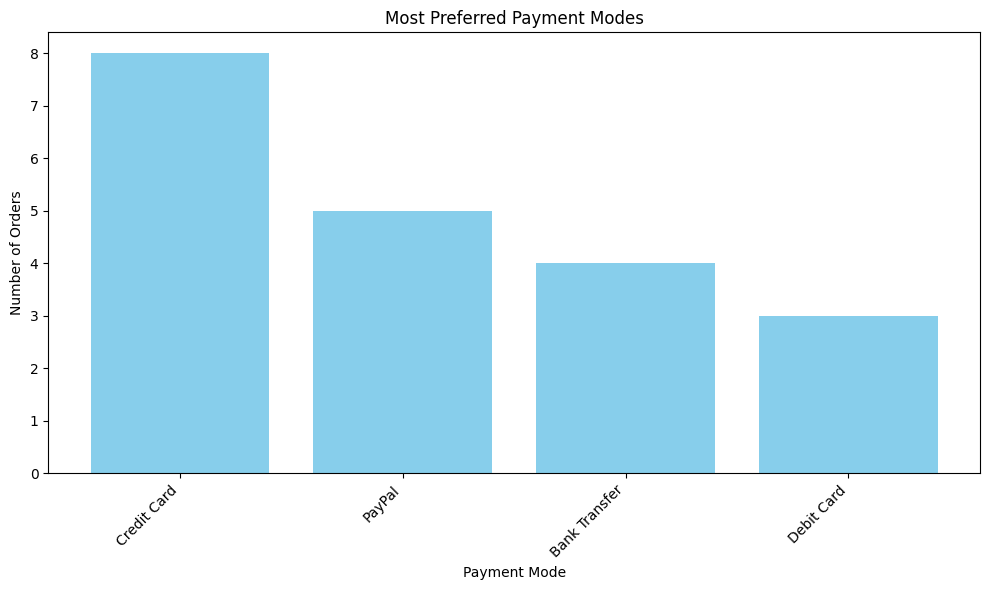

    payment_mode  order_count
0    Credit Card            8
1         PayPal            5
2  Bank Transfer            4
3     Debit Card            3


In [28]:
# Create a cursor object
cr = con.cursor()

# Query data to get counts of orders by payment mode
cr.execute('''
    SELECT payment_mode, COUNT(*) AS order_count
    FROM order_details
    GROUP BY payment_mode
    ORDER BY order_count DESC
''')
payment_mode_data = pd.DataFrame(cr.fetchall(), columns=['payment_mode', 'order_count'])


# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(payment_mode_data['payment_mode'], payment_mode_data['order_count'], color='skyblue')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Display the payment mode data
print(payment_mode_data)

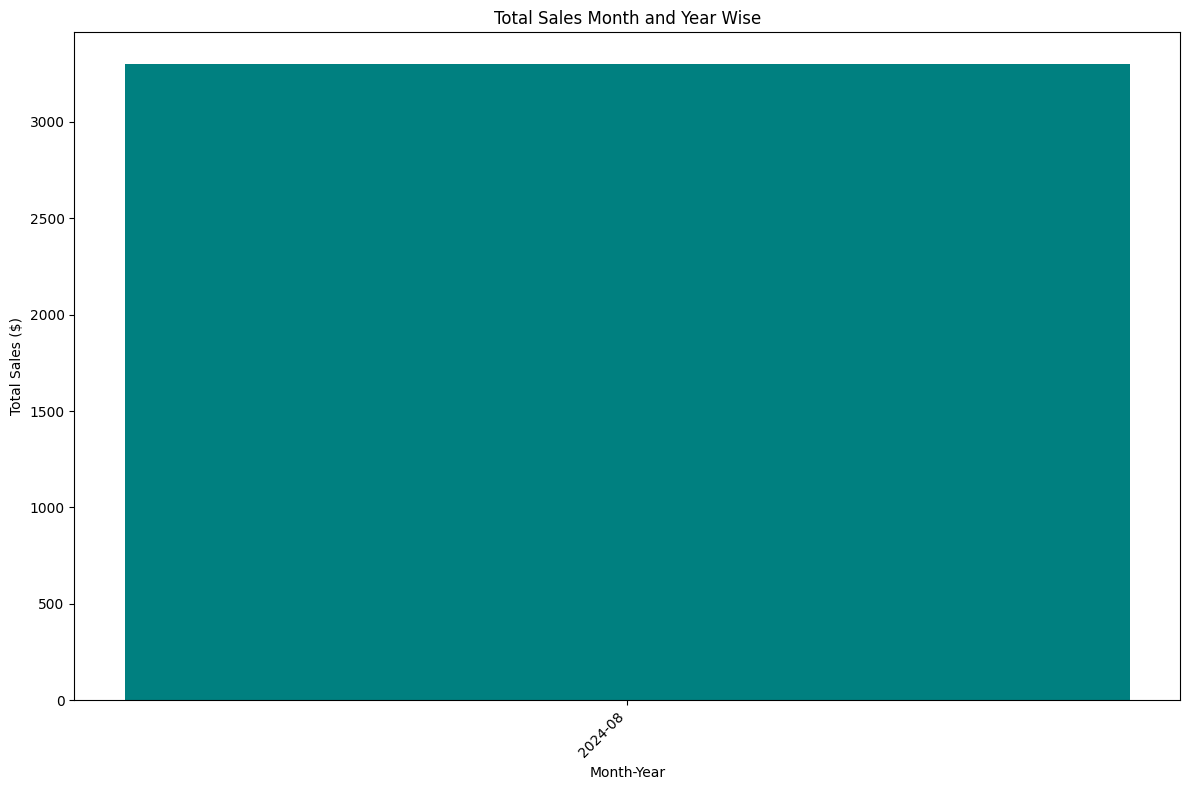

  month_year  total_sales
0    2024-08       3300.0


In [29]:
# Create a cursor object
cr = con.cursor()

# Query data to get total sales by month and year
cr.execute('''
    SELECT DATE_FORMAT(order_date, '%Y-%m') AS month_year, SUM(total_price) AS total_sales
    FROM order_details
    GROUP BY month_year
    ORDER BY month_year
''')
sales_data = pd.DataFrame(cr.fetchall(), columns=['month_year', 'total_sales'])

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(sales_data['month_year'], sales_data['total_sales'], color='teal')
plt.title('Total Sales Month and Year Wise')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Display the sales data
print(sales_data)